In [141]:
# 모듈 Import
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
# from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# font_path = './malgun.ttf'
# font_name = font_manager.FontProperties(fname = font_path).get_name()
# print(font_name)
# rc('font', family = font_name)

In [120]:
df = pd.read_csv('csv/auto-mpg.csv')
# print(df.head())
# print(df.tail())
# df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [121]:
# 파이썬과 판다스의 기본 자료형 비교
diff = pd.DataFrame([['int', 'int64'],
                     ['float', 'float64'],
                     ['str', 'objcet']],
                    columns=['python', 'pandas'],
                    index=['정수', '실수','문자열']
                    )
diff

,python,pandas
정수,int,int64
실수,float,float64
문자열,str,objcet


In [122]:
df.count()
df.dtypes
df.origin.dtypes
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [123]:
# 최소
# df.mean()

columns = ['mpg', 'cylinders', 'weight', 'acceleration']

# 개별적으로 값 구하기
min = df[columns].mean()
median = df[columns].median()
max = df[columns].max()
print(min)
print()
print(median)
print()
print(max)
print()

pd.DataFrame({'min':min, 'median':median, 'max':max}).T


mpg               23.514573
cylinders          5.454774
weight          2970.424623
acceleration      15.568090
dtype: float64

mpg               23.0
cylinders          4.0
weight          2803.5
acceleration      15.5
dtype: float64

mpg               46.6
cylinders          8.0
weight          5140.0
acceleration      24.8
dtype: float64



,mpg,cylinders,weight,acceleration
min,23.514573,5.454774,2970.424623,15.56809
median,23.000000,4.000000,2803.500000,15.50000
max,46.600000,8.000000,5140.000000,24.80000


In [124]:
# 평균
print('mpg 평균: ', df['mpg'].mean())
print()
print(df[['mpg', 'acceleration']].mean())

mpg 평균:  23.514572864321607

mpg             23.514573
acceleration    15.568090
dtype: float64


In [125]:
# 중간값
print('mpg 평균: ', df['mpg'].median())
print()
print(df[['mpg', 'acceleration']].median())

mpg 평균:  23.0

mpg             23.0
acceleration    15.5
dtype: float64


In [126]:
# 표준편차
print('mpg 표준편차: ', df['mpg'].std())
print()
print(df[['mpg', 'acceleration']].std())

mpg 표준편차:  7.815984312565782

mpg             7.815984
acceleration    2.757689
dtype: float64


In [127]:
# 상관계수 (0~1.0 또는 -1.0~1.0) 사이의 값을 출력
# 양의 상관관계, 음의 상관과계
df[['mpg', 'displacement', 'weight', 'acceleration']].corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.804203,-0.831741,0.420289
displacement,-0.804203,1.000000,0.932824,-0.543684
weight,-0.831741,0.932824,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.417457,1.000000


<Axes: xlabel='weight', ylabel='mpg'>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

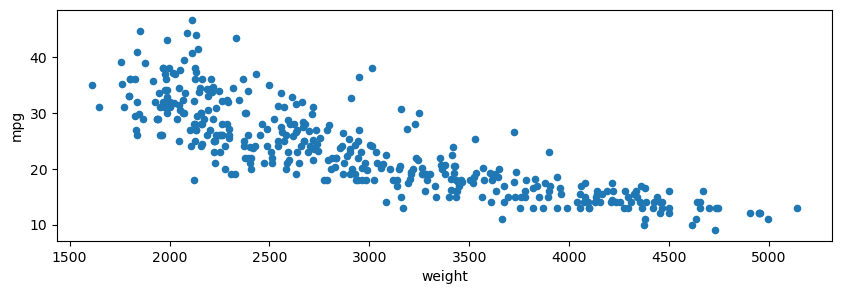

In [128]:
df[['mpg', 'weight']].plot(x = 'weight', y = 'mpg', kind = 'scatter', figsize = (10, 3))

In [129]:
# 남북한 발전전력량 데이터
df = pd.read_excel('excel/남북한_발전전력량.xlsx')

# 남한, 북한
df2 = df.loc[[0, 3]]
df2 = df2.drop('발전 전력별', axis = 'columns')
df2 = df2.set_index('남북한별')
df2.index = ['north', 'south']
df2

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
north,277,263,247,221,231,230,213,193,170,186,...,221,216,190,239,235,249,238,239,255,264
south,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944


In [130]:
# 남북한 발전전력량 데이터
df = pd.read_excel('excel/남북한_발전전력량.xlsx')

# 남한, 북한 전력 합계 데이터
df['남북한별'] = df['남북한별'].ffill()
df2 = df.set_index(['남북한별', '발전 전력별'])
df2 = df2.loc[[('북한', '합계'), ('남한', '합계')]]
# 필요한 컬럼 
df2.index = ['north', 'south']
df2

# 타입 확인
df2.dtypes

# Object -> int
for year in df2.columns:
    df2[year] = df2[year].map(int)

<Axes: >

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

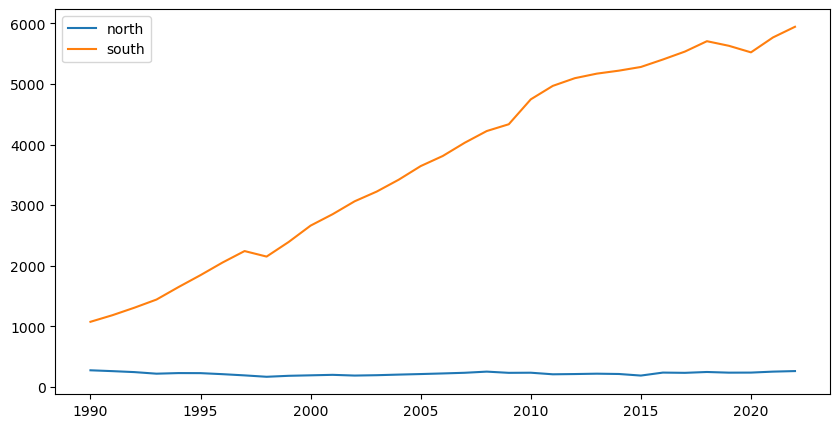

In [131]:
# 행,열 변경
df2_T = df2.T

# 선 그래프
df2_T.plot(figsize = (10, 5))

<Axes: >

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

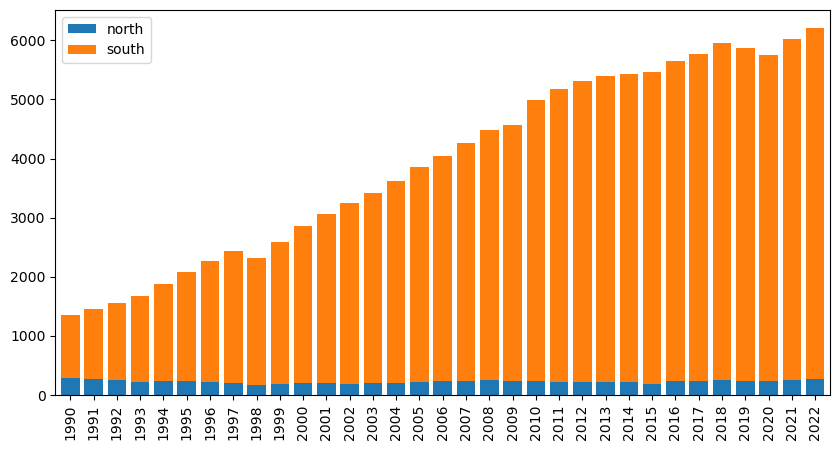

In [132]:
# 수직 막대 그래프
df2_T.plot(kind = 'bar', width = 0.8, stacked = True, figsize = (10, 5))

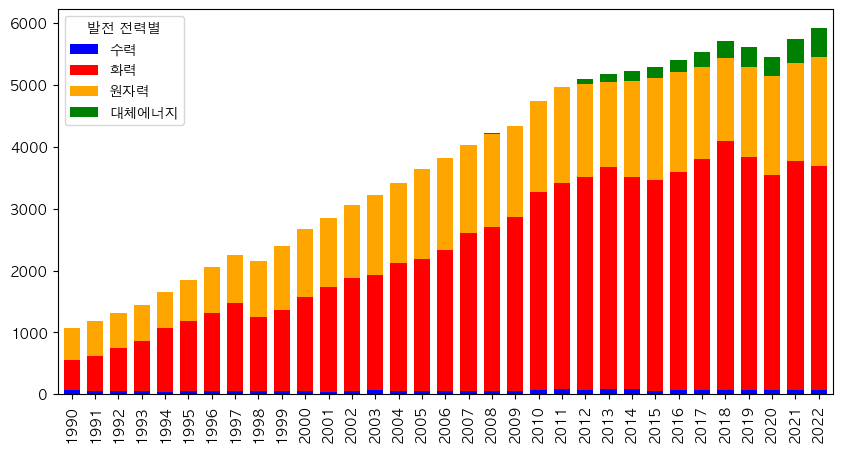

In [143]:

# 발전전력별 
df3 = df.set_index(['남북한별', '발전 전력별'])
df3 = df3.loc['남한']
df3 = df3.replace({'-':0})

# 데이터타입 확인
df3.dtypes

# 행, 열 변경
df3_T = df3.T
df3_T = df3_T[['수력', '화력', '원자력', '대체에너지']]
df3_T.plot(kind = 'bar', width=0.7, stacked=True, figsize = (10,5), color = ['blue', 'red', 'orange', 'green'])

plt.savefig('결과.png')

<Axes: ylabel='Frequency'>

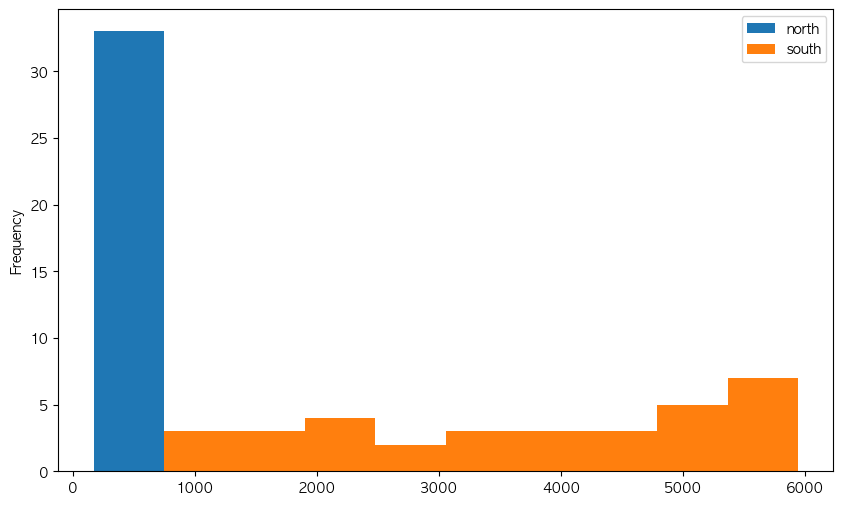

In [149]:
# 히스토그램
df2_T.plot(
    kind='hist', 
    figsize=(10,6)
)

In [153]:
# 
car = pd.read_csv('csv/auto-mpg.csv')

columns = ['mpg','cylinders','weight','acceleration','model year','origin']
car2 = car[columns]

# 상관계수
car2.corr()

,mpg,cylinders,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.896017,-0.505419,-0.348746,-0.562543
weight,-0.831741,0.896017,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.581024,0.205873,0.180662,1.000000


<Axes: xlabel='weight', ylabel='mpg'>

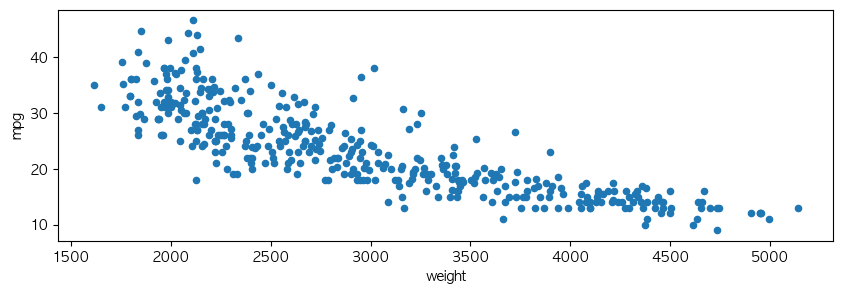

In [161]:
# 산점도
car2.plot(kind='scatter',x='weight',y='mpg',figsize=(10,3))

<Axes: >

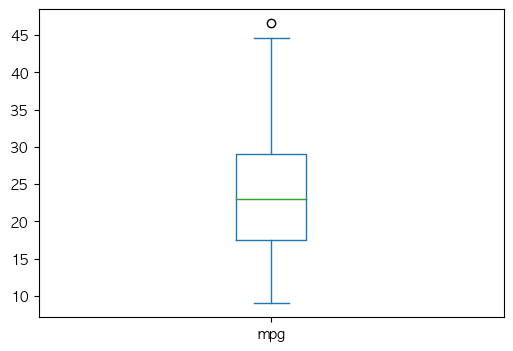

In [162]:
# 박스 플롯
car2['mpg'].plot(kind='box',figsize=(6,4))

<Axes: >

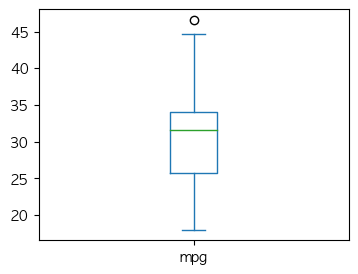

In [169]:
# 
mask = car2['origin'] == 3
car2[mask]['mpg'].plot(kind='box', figsize=(4,3))

<Axes: ylabel='count'>

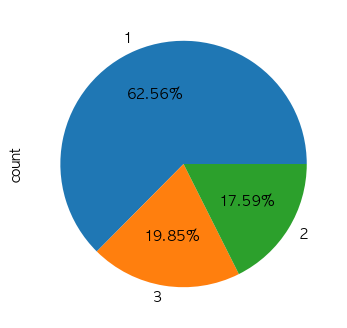

In [178]:
# 
car2['origin'].value_counts().plot(kind='pie', figsize=(4,4),autopct='%.2f%%')